In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot

# Classification of Delhi Metro stations.


Introduction
Delhi Metro is a rapid transit system serving Delhi and its satellite cities in the National Capital Region of India. As of now, there are a total of 229 metro stations including the Airport Express stations. The first section of the Delhi Metro opened on 25 December 2002 with the Red Line,[2] and has since been expanded to around 347.66 km(216.03 miles) of route length as of 4 October 2019. The network has nine operational lines and is built and operated by the Delhi Metro Rail Corporation Limited (DMRC). The Delhi Metro Rail Corporation makes 2,700 trips per day carrying 1.5 million passengers, who on an average travel a distance of 17 kilometres each.

For this project, we will try to look at the places surrounding these metro stations and classify them accordng to the similarity of nearby venues. Every one use metro transit to migrate from one place to another for reasons which can be personal of professional. If there are more professional places like companies, offices surrounding a station then it will mostly be used by working professionals. Then there are some stations with many unversities or colleges nearby and is used by Students mostly. Stations which have places like amusement parks, malls, monuments are used by people for recreation.

We can classify stations by primary usage analyzing the data that contains the number of nearby venues according to their category. This can help plan further extension of the network and find places for new development.

Data
In this section we will describe our base data which we will analyze to reach the goal we want.


# Classification of Delhi Metro stations.¶

# Uplod DMRC Data

In [2]:
dmrc =  pd.read_csv(r"E:\download\DELHI_METRO_DATA.csv")

In [3]:
dmrc

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,Yellow Line,28.714401,77.167288
1,AIIMS,Yellow Line,28.566860,77.207806
2,Akshardham,Blue Line,28.617842,77.279488
3,Anand Vihar ISBT,Blue Line branch,28.646753,77.318004
4,Arjan Garh,Yellow Line,28.480735,77.125762
...,...,...,...,...
223,Vidhan Sabha,Yellow Line,28.686322,77.221727
224,Vinobapuri,Pink Line,28.566976,77.249191
225,Vishwa Vidyalaya,Yellow Line,28.695037,77.214719
226,Welcome,Red Line,28.651718,77.221939


# EXploaritary Data analysis

In [4]:
dmrc.describe(include="all")

,Station,Line,Latitude,Longitude
count,228,228,221.000000,221.000000
unique,228,11,NaN,NaN
top,Pandit Shree Ram Sharma,Blue Line,NaN,NaN
freq,1,49,NaN,NaN
mean,NaN,NaN,28.560811,77.183246
std,NaN,NaN,0.723198,0.101508
min,NaN,NaN,17.920862,76.870085
25%,NaN,NaN,28.558581,77.107181
50%,NaN,NaN,28.622288,77.199336
75%,NaN,NaN,28.668945,77.260667


# Find the null values in data

In [5]:
dmrc.isnull().sum()

Station      0
Line         0
Latitude     7
Longitude    7
dtype: int64

# fill the null values in data

In [6]:
dmrc.fillna(dmrc["Latitude"].median(),inplace= True)
dmrc.fillna(dmrc["Longitude"].median(),inplace= True)

In [7]:
dmrc.isnull().sum()

Station      0
Line         0
Latitude     0
Longitude    0
dtype: int64

# find the unique station and number of stations in data

In [8]:
dmrc["Station"].unique()

array(['Adarsh Nagar', 'AIIMS', 'Akshardham', 'Anand Vihar ISBT',
       'Arjan Garh', 'Arthala', 'Ashok Park Main', 'Ashram', 'Azadpur',
       'Badarpur Border', 'Badkhal Mor', 'Bahadurgarh City',
       'Barakhambha Road', 'Bata Chowk', 'Bhikaji Cama Place',
       'Botanical Garden', 'Brigadier Hoshiyar Singh',
       'Central Secretariat', 'Chandni Chowk', 'Chawri Bazar',
       'Chhatarpur', 'Chirag Delhi', 'Civil Lines',
       'Dabri Mor-Janakpuri South', 'Dashrath Puri', 'Delhi Aerocity',
       'Delhi Cantonment', 'Delhi Gate', 'Dhaula Kuan', 'Dilshad Garden',
       'Durgabai Deshmukh South Campus', 'Dwarka', 'Dwarka Mor',
       'Dwarka Sector 8', 'Dwarka Sector 9', 'Dwarka Sector 10',
       'Dwarka Sector 11', 'Dwarka Sector 12', 'Dwarka Sector 13',
       'Dwarka Sector 14', 'Dwarka Sector 21', 'East Azad Nagar',
       'East Vinod Nagar – Mayur Vihar-II', 'Escorts Mujesar',
       'ESI Hospital', 'Ghevra', 'Ghitorni', 'Gokulpuri', 'Golf Course',
       'Govind Puri', 'G

In [9]:
dmrc["Station"].nunique()

228

# The number unique metros lines and total number of metro line

In [10]:
dmrc.head()

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,Yellow Line,28.714401,77.167288
1,AIIMS,Yellow Line,28.566860,77.207806
2,Akshardham,Blue Line,28.617842,77.279488
3,Anand Vihar ISBT,Blue Line branch,28.646753,77.318004
4,Arjan Garh,Yellow Line,28.480735,77.125762


In [11]:
dmrc["Line"].unique()

array(['Yellow Line', 'Blue Line', 'Blue Line branch', 'Red Line',
       'Green Line', 'Pink Line', 'Violet Line', 'Magenta Line',
       'Orange Line', 'Grey Line', 'Green Line branch'], dtype=object)

In [12]:
dmrc["Line"].nunique()

11

In [13]:
dmrc["Line"].value_counts()

Blue Line            49
Yellow Line          36
Violet Line          31
Red Line             29
Pink Line            29
Green Line           20
Magenta Line         20
Blue Line branch      7
Orange Line           4
Grey Line             2
Green Line branch     1
Name: Line, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='Line'>

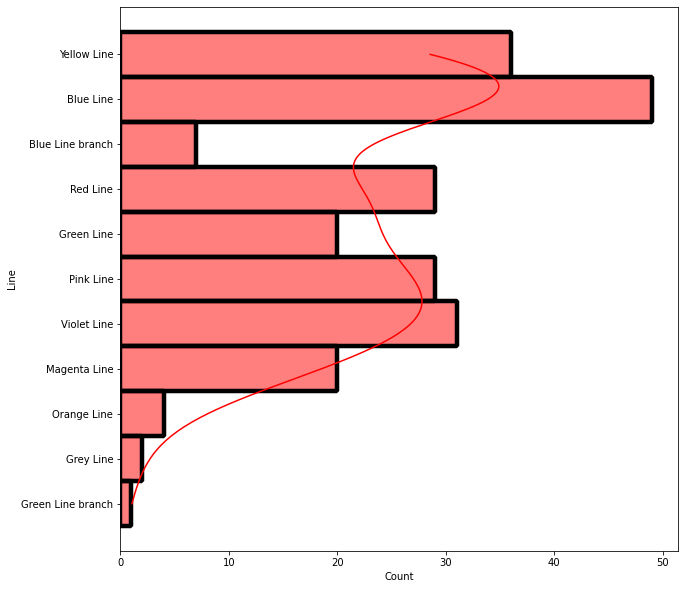

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.histplot(y=dmrc["Line"],bins=40,kde=True,color="red")

# using folium to visualise the delhi metrostations geographically

In [15]:
!pip install folium

In [16]:
import folium 

In [17]:
dmrc.head()


,Station,Line,Latitude,Longitude
0,Adarsh Nagar,Yellow Line,28.714401,77.167288
1,AIIMS,Yellow Line,28.566860,77.207806
2,Akshardham,Blue Line,28.617842,77.279488
3,Anand Vihar ISBT,Blue Line branch,28.646753,77.318004
4,Arjan Garh,Yellow Line,28.480735,77.125762


In [18]:
latitude,longitude=  dmrc["Latitude"].median(),dmrc["Longitude"].median()

In [19]:
map1 =  folium.Map(location=[latitude,longitude],zoom_start=11)
#zoom_start (int, default 10) – Initial zoom level for the map


In [20]:
map1

In [21]:
for lat,long,label in zip(dmrc["Latitude"],dmrc["Longitude"],dmrc["Station"]):
    folium.CircleMarker(location=[lat,long],popup= label,radius=5,fill=True,fill_color="blue").add_to(map1)
map1    

In [22]:
dmrc.Line.unique()

array(['Yellow Line', 'Blue Line', 'Blue Line branch', 'Red Line',
       'Green Line', 'Pink Line', 'Violet Line', 'Magenta Line',
       'Orange Line', 'Grey Line', 'Green Line branch'], dtype=object)

In [23]:
dmrc

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,Yellow Line,28.714401,77.167288
1,AIIMS,Yellow Line,28.566860,77.207806
2,Akshardham,Blue Line,28.617842,77.279488
3,Anand Vihar ISBT,Blue Line branch,28.646753,77.318004
4,Arjan Garh,Yellow Line,28.480735,77.125762
...,...,...,...,...
223,Vidhan Sabha,Yellow Line,28.686322,77.221727
224,Vinobapuri,Pink Line,28.566976,77.249191
225,Vishwa Vidyalaya,Yellow Line,28.695037,77.214719
226,Welcome,Red Line,28.651718,77.221939


# Converting all the line with a integer value so that we can use it easily.

In [24]:
dmrc["Line"].replace({'Yellow Line': 1,
 'Red Line': 2,
 'Blue Line': 3,
 'Blue Line branch': 3,
 'Pink Line': 4,
 'Magenta Line': 5,
 'Green Line': 6,
 'Green Line branch': 6,
 'Violet Line': 7,
 'Orange Line': 8,
 'Grey Line': 9},inplace=True)


In [25]:
dmrc

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,1,28.714401,77.167288
1,AIIMS,1,28.566860,77.207806
2,Akshardham,3,28.617842,77.279488
3,Anand Vihar ISBT,3,28.646753,77.318004
4,Arjan Garh,1,28.480735,77.125762
...,...,...,...,...
223,Vidhan Sabha,1,28.686322,77.221727
224,Vinobapuri,4,28.566976,77.249191
225,Vishwa Vidyalaya,1,28.695037,77.214719
226,Welcome,2,28.651718,77.221939


In [26]:
colors_dict = {1:'#FFFF00', 2:'#FF0000',3:'#0000FF', 4:'#FFC0CB',5:'#FF00FF', 6:'#008000',7:'#EE82EE', 8:'#FFA500',9:'#808080'}

In [27]:
for line,lat,long,label in zip(dmrc["Line"],dmrc["Latitude"],dmrc["Longitude"],dmrc["Station"]):
    folium.Circle(location=[lat,long],popup= label,radius=20,color=colors_dict[line]).add_to(map1)
map1    

#Now we have a good visualiztion of each station and also we easily can trace the path of each line.

# Methodology
We have the the data related to the metro station under DMRC, their latitudes and longitudes values with the line of Metro that passed through them.

For further processing we will be utilizing the FOURSQUARE API and explore the venues in a specific radius around that using their coordinates values.

We will use explore query under venues of the api calls. You can read more about the various Endpoints provided Foursquare api on the following link. https://developer.foursquare.com/docs/places-api/endpoints/

The advantage of using Foursquare api is that venues are classiied in particular categories which will make it easy to calculate the number of venues surround a given location for each category and that is actually the base of our classification.

In [28]:
import pandas.io.json #to tranforming json file into a pandas dataframe library

In [29]:
import requests

In [30]:
 CLIENT_ID = "G1YQ1F5XM1VM5H2K5W2XF3GSNFH0CYO1FM5WCKVT2FH04NYV" # your Foursquare ID
CLIENT_SECRET = "E120ZL1TXDNTM3TEAXQBOV3I11DN3QATRCCKROWPKBCDQFEZ"  # your Foursquare Secret
VERSION = '20180605'



In [31]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            


In [32]:
# make the GET request
results = requests.get(categories_url).json()

In [33]:
results

{'meta': {'code': 200, 'requestId': '616da08df289121d191c4e94'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [34]:
results["response"]["categories"][1]["id"]

'4d4b7105d754a06372d81259'

In [35]:
len(results["response"]['categories'])

10

In [36]:
categories_list = []
# Let's print only the top-level categories and their IDs and also add them to categories_list


In [37]:
categories_list = []

def print_categories(categories):    
    for category in categories:
        print(category['name'] + ' (' + category['id'] + ')')
        categories_list.append((category['name'], category['id']))
print_categories(results['response']['categories'])

Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


In [38]:
dmrc.reset_index(inplace=True)

In [39]:
station_venus= dmrc.copy()

In [40]:
station_venus

,index,Station,Line,Latitude,Longitude
0,0,Adarsh Nagar,1,28.714401,77.167288
1,1,AIIMS,1,28.566860,77.207806
2,2,Akshardham,3,28.617842,77.279488
3,3,Anand Vihar ISBT,3,28.646753,77.318004
4,4,Arjan Garh,1,28.480735,77.125762
...,...,...,...,...,...
223,223,Vidhan Sabha,1,28.686322,77.221727
224,224,Vinobapuri,4,28.566976,77.249191
225,225,Vishwa Vidyalaya,1,28.695037,77.214719
226,226,Welcome,2,28.651718,77.221939


In [41]:

for c in categories_list:
    print(c)

('Arts & Entertainment', '4d4b7104d754a06370d81259')
('College & University', '4d4b7105d754a06372d81259')
('Event', '4d4b7105d754a06373d81259')
('Food', '4d4b7105d754a06374d81259')
('Nightlife Spot', '4d4b7105d754a06376d81259')
('Outdoors & Recreation', '4d4b7105d754a06377d81259')
('Professional & Other Places', '4d4b7105d754a06375d81259')
('Residence', '4e67e38e036454776db1fb3a')
('Shop & Service', '4d4b7105d754a06378d81259')
('Travel & Transport', '4d4b7105d754a06379d81259')


In [42]:

for c in categories_list:
    print(c[0])

Arts & Entertainment
College & University
Event
Food
Nightlife Spot
Outdoors & Recreation
Professional & Other Places
Residence
Shop & Service
Travel & Transport


In [43]:

for c in categories_list:
    station_venus[c[0]]=0 # put column name and thier values is 0

In [44]:
station_venus

,index,Station,Line,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0,Adarsh Nagar,1,28.714401,77.167288,0,0,0,0,0,0,0,0,0,0
1,1,AIIMS,1,28.566860,77.207806,0,0,0,0,0,0,0,0,0,0
2,2,Akshardham,3,28.617842,77.279488,0,0,0,0,0,0,0,0,0,0
3,3,Anand Vihar ISBT,3,28.646753,77.318004,0,0,0,0,0,0,0,0,0,0
4,4,Arjan Garh,1,28.480735,77.125762,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,223,Vidhan Sabha,1,28.686322,77.221727,0,0,0,0,0,0,0,0,0,0
224,224,Vinobapuri,4,28.566976,77.249191,0,0,0,0,0,0,0,0,0,0
225,225,Vishwa Vidyalaya,1,28.695037,77.214719,0,0,0,0,0,0,0,0,0,0
226,226,Welcome,2,28.651718,77.221939,0,0,0,0,0,0,0,0,0,0


In [45]:

def get_venues_count(lat,long, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                lat,
                long,
                radius,
                categoryId)
    try:
        return requests.get(explore_url).json()['response']['totalResults']
    except Exception as e:
        return 0

#Here i may seem to start from 180 thats' because in Foursquare Regular acoount we can only call 950 per day and for our dataset we have 221 stations and 10 category for each station so i have run in several three days or you can use different accounts and just see from where you are going to see all 0 counts for each category.

In [46]:
# fillinng the category columns using locations


In [47]:
for i, row in station_venus[station_venus.index > 179].iterrows():
    print(i)
    for c in categories_list:        
        station_venus.loc[i, c[0]] = get_venues_count(station_venus.Latitude.iloc[i],station_venus.Longitude.iloc[i], radius=1000,categoryId=c[1])
    station_venus.to_csv('station_venus.csv')

180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227


In [48]:
df =  pd.read_csv("station_venus.csv",index_col=0)

In [49]:
df

,index,Station,Line,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0,Adarsh Nagar,1,28.714401,77.167288,0,0,0,0,0,0,0,0,0,0
1,1,AIIMS,1,28.566860,77.207806,0,0,0,0,0,0,0,0,0,0
2,2,Akshardham,3,28.617842,77.279488,0,0,0,0,0,0,0,0,0,0
3,3,Anand Vihar ISBT,3,28.646753,77.318004,0,0,0,0,0,0,0,0,0,0
4,4,Arjan Garh,1,28.480735,77.125762,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,223,Vidhan Sabha,1,28.686322,77.221727,3,3,0,4,2,3,3,1,2,1
224,224,Vinobapuri,4,28.566976,77.249191,4,8,1,23,2,5,6,5,14,5
225,225,Vishwa Vidyalaya,1,28.695037,77.214719,1,7,0,8,0,3,3,3,6,4
226,226,Welcome,2,28.651718,77.221939,6,6,0,19,1,10,4,3,11,21


In [50]:
dmrc_data= df[180:]

In [51]:
dmrc_data.drop("Unnamed: 0",axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
dmrc_data.drop("index",axis=1,inplace=True)

In [ ]:

plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = dmrc_data)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)


plt.show()

Ignoring the Latitude and Longitude and analysing the categories distribution we can see that most of the venues are in the category of Food, Professional places and Shops & Services. While others are comparitively less in number.

To make a good visualization let us Normalize the data so that every cell value will be in between 1 and 0 using standaard scalar  and removing the Latitude and longitude column through slicing

In [ ]:
dmrc_data

In [ ]:
dmrc_data.values[:,4:]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=  StandardScaler()

In [ ]:
scaled_data= sc.fit_transform(dmrc_data.values[:,4:])

In [ ]:
scaled_data

Now we need to define a dataframe that we will use for clustering using the normalized value.

Note: We use the Normalize Venues count values for each category as a base of our clustering the station. That is for what reason that station is beiing used by passengers.

In [ ]:
cluster_data =  pd.DataFrame(scaled_data)
cluster_data.columns= [c[0] for c in categories_list

In [ ]:
cluster_data

In [ ]:

plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = cluster_data)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)


plt.show()

# Clustering using KMeans Clsutering
So we have the data and using an unsupervised clustering Algorithm known as KMeans Clusteing we will Create clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
values=[]
for i in range(1,30):
    km  =KMeans(n_clusters=i)
    km.fit(cluster_data)
    values.append(km.inertia_)
    


In [ ]:
plt.plot(range(1,30),values,marker="*")
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sil = []

kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2,kmax+1):
  kmeans = KMeans(n_clusters = k).fit(cluster_data)
  labels = kmeans.labels_
  sil.append(silhouette_score(cluster_data, labels, metric = 'euclidean'))

In [ ]:
sil

In [ ]:
plt.plot(range(2,11),sil,marker="*")
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('silhouette_score Method For Optimal k')
plt.show()

#
Here too we see that value of silhoutte score is max at cluster 2 but we know that we will need to create more than two clusters. Also because we cannot find a Global maxima we have a local maxima when the value of 4. So for our Clustering let us use K value as 4.

In [ ]:
kcluster= KMeans(n_clusters=4) 
kcluster.fit(cluster_data)
k_labels=  kcluster.labels_

In [ ]:
k_labels

In [ ]:
(unique,counts)=  np.unique(k_labels,return_counts=True)

In [ ]:
frequencies=  np.asarray((unique,counts))

In [ ]:
frequencies.T

After seeing the frequency of values for each cluster we can replace the labels in Descending order of No. of stations. i.e count.

In [ ]:
replace_labels= {0:3,1:1,2:2,3:0}

In [ ]:
for i in range(len(k_labels)):
    k_labels[i] = replace_labels[k_labels[i]]
stations_clusters_df = station_venus.copy()
stations_clusters_df['Cluster'] = k_labels
stations_clusters_minmax_df = cluster_data.copy()
stations_clusters_minmax_df['Cluster'] = k_labels
stations_clusters_minmax_df['Station'] = station_venus['Station']
stations_clusters_minmax_df['Latitude'] = station_venus['Latitude']
stations_clusters_minmax_df['Longitude'] = station_venus['Longitude']

In [ ]:
k_labels[]